<a href="https://colab.research.google.com/github/AndrewstheBuilder/FromScratch_NeuralNetworks/blob/main/Micrograd_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### MNIST using micrograd_andrews module

#### Imports

In [1]:
pip install micrograd_andrews

In [2]:
# Micrograd imports
from micrograd_andrews.engine import Value
from micrograd_andrews.nn import Neuron, Layer, MLP

import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
from keras.datasets import mnist
import copy

np.random.seed(1337)
random.seed(1337)

11490434/11490434 [==============================] - 1s 0us/step
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)
train_x[1] raw [  0   0   0   0  48 238 252 252 252 237   0]


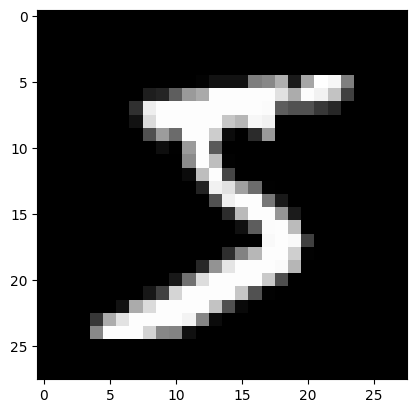

In [3]:
# training and test data
(train_X, train_y), (test_X, test_y) = mnist.load_data()

print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

print('train_x[1] raw',train_X[1][5][10:21])
pyplot.imshow(train_X[0], cmap=pyplot.get_cmap('gray'))
pyplot.show()

# def findOne(x):
#   if x == 1:
#     return True
#   else:
#     return False

# results = filter(findOne, train_y)

# for y in results:
#   print(y)

# from matplotlib import pyplot
# for i in range(9):
#   pyplot.subplot(330 + 1 + i)
#   pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
#   pyplot.show()


In [4]:
yy = copy.deepcopy(train_y)
unique_integers = list(set(yy))
unique_integers.sort()
print(unique_integers)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


#### Train on MNIST

In [5]:
def one_hot_encode(number, num_classes):
    one_hot_vector = [0] * num_classes
    one_hot_vector[number] = 1
    return one_hot_vector
# convert train_y to one hot encoding
num_classes = len(unique_integers)
yy_one = [one_hot_encode(num, num_classes) for num in yy]
print(yy_one[2])
print(yy[2])

[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
4


### Draft 1 Gradient Descent for MNIST
- It seems like this draft the gradients are not getting through to the parameters somehow. Its being stopped!!

In [6]:
# define the MLP model
in_inputs=28*28
output_dim = len(unique_integers)
model = MLP(in_inputs, [2,2,output_dim])

# forward the model to get scores
limit_x=5
# reshape here to flatten the 2D [28,28] into 1D -> 28*28
inputs = train_X[:limit_x].reshape(limit_x,-1)
scores = list(map(model, inputs))
expected_outputs = yy_one[:limit_x]

iterations = 10
for iter in range(iterations):
  # Begin gradient descent iterations
  # Get probabilities of each output
  probs_predicted = []
  for i in range(len(scores)):
      total = sum(scores[i])
      probs_predicted.append([])
      if total.data == 0:
          print(f"Alert: Sum of scores at index {i} is zero.")
          # layer_num = 0
          # for layer in model.layers:
            # print(f'layer {layer_num}')
            # print(layer.parameters())
            # print("len of parameters:",len(layer.parameters()))
            # layer_num += 1
          # You can also raise an exception if needed
          # raise ValueError(f"Sum of scores at index {i} is zero.")
          # How can I log the parameters if my model is fing up?
          # for p in model.parameters():
          #   print('p',p)
      for j in range(len(scores[i])):
          if total.data == 0:
              probs_predicted[i].append(Value(0.0))
          else:
              probs_predicted[i].append(scores[i][j] / total)

  # probs = [Value(0.0) if sum(scores[i]).data == 0 else scores[i][j]/sum(scores[i]) for i in range(len(scores)) for j in range(len(scores[i]))]
  # Why do I get all zeros as the outputs for certain inputs??
    # its because of relu()
    # Solution: I think it will work itself out once I start training it
  # print(probs_predicted)
  # print(expected_outputs)
  # print(np.array(probs_predicted).shape)
  # print(len(probs_predicted))

  # Mean Squared Error(MSE) Loss
    # Gain an intuition for how this will back propagate to help you update your parameters
  losses = []
  for yi_one, probs in zip(yy_one, probs_predicted):
    loss = []
    for k in range(len(yi_one)):
      # (actual-expected)**2
      loss.append((yi_one[i]-probs[i])**2)
    losses.append(loss)
  # print('losses',losses)
  # print('losses shape',np.array(losses).shape)
  # losses = [(yi_one-probs)**2 for yi_one, probs in zip(yy_one, probs_predicted)]

  # Back propagation
    # take (sum_of_each_example/num_classes)
    # then data_loss = sum across all the examples / num_of_examples
    # data_loss.backward()
  data_loss = None
  data_loss = [sum(loss)/num_classes for loss in losses ]
  data_loss = sum(data_loss)/limit_x
  # print(data_loss)
  data_loss.backward()

  # Update parameters
  for p in model.parameters():
    p -= p.grad

Alert: Sum of scores at index 0 is zero.
Alert: Sum of scores at index 1 is zero.
Alert: Sum of scores at index 2 is zero.
Alert: Sum of scores at index 3 is zero.
Alert: Sum of scores at index 0 is zero.
Alert: Sum of scores at index 1 is zero.
Alert: Sum of scores at index 2 is zero.
Alert: Sum of scores at index 3 is zero.
Alert: Sum of scores at index 0 is zero.
Alert: Sum of scores at index 1 is zero.
Alert: Sum of scores at index 2 is zero.
Alert: Sum of scores at index 3 is zero.
Alert: Sum of scores at index 0 is zero.
Alert: Sum of scores at index 1 is zero.
Alert: Sum of scores at index 2 is zero.
Alert: Sum of scores at index 3 is zero.
Alert: Sum of scores at index 0 is zero.
Alert: Sum of scores at index 1 is zero.
Alert: Sum of scores at index 2 is zero.
Alert: Sum of scores at index 3 is zero.
Alert: Sum of scores at index 0 is zero.
Alert: Sum of scores at index 1 is zero.
Alert: Sum of scores at index 2 is zero.
Alert: Sum of scores at index 3 is zero.
Alert: Sum of sc

### Draft 2 Gradient Descent for MNIST

In [54]:
# define the MLP model
in_inputs=28*28
output_dim = len(unique_integers)
model = MLP(in_inputs, [2,2,output_dim])

# limit the training set to 5 examples for now
limit_x=5
# reshape here to flatten the 2D [28,28] into 1D -> 28*28
inputs = train_X[:limit_x].reshape(limit_x,-1)
expected_outputs = yy_one[:limit_x]

# Begin gradient descent iterations
iterations = 10
for iter in range(iterations):
  # forward the model to get scores
  scores = list(map(model, inputs))
  print('scores',scores)
  print('scores.shape',np.array(scores).shape)
  # Get probabilities of each output
  probs_predicted = []
  for i in range(len(scores)):
      total = sum(scores[i])
      probs_predicted.append([])
      if total.data == 0:
          print(f"Alert: Sum of scores at index {i} is zero.")
          # layer_num = 0
          # for layer in model.layers:
            # print(f'layer {layer_num}')
            # print(layer.parameters())
            # print("len of parameters:",len(layer.parameters()))
            # layer_num += 1
          # You can also raise an exception if needed
          # raise ValueError(f"Sum of scores at index {i} is zero.")
          # How can I log the parameters if my model is fing up?
          # for p in model.parameters():
          #   print('p',p)
      for j in range(len(scores[i])):
          if total.data == 0:
              probs_predicted[i].append(Value(0.0))
          else:
              probs_predicted[i].append(scores[i][j] / total)

  # probs = [Value(0.0) if sum(scores[i]).data == 0 else scores[i][j]/sum(scores[i]) for i in range(len(scores)) for j in range(len(scores[i]))]
  # Why do I get all zeros as the outputs for certain inputs??
    # its because of relu()
    # Solution: I think it will work itself out once I start training it
  print(probs_predicted)
  # print(expected_outputs)
  # print(np.array(probs_predicted).shape)
  # print(len(probs_predicted))

  # Mean Squared Error(MSE) Loss
    # Gain an intuition for how this will back propagate to help you update your parameters
  losses = []
  for yi_one, probs in zip(yy_one, probs_predicted):
    loss = []
    for k in range(len(yi_one)):
      # (actual-expected)**2
      loss.append((yi_one[i]-probs[i])**2)
    losses.append(loss)
  # Calculate total loss
    # take (sum_of_each_example/num_classes)
    # then data_loss = sum across all the examples / num_of_examples
    # data_loss.backward()
  data_loss = [sum(loss)/num_classes for loss in losses ]
  data_loss = sum(data_loss)/limit_x
  # print('losses',losses)
  # print('losses shape',np.array(losses).shape)
  # losses = [(yi_one-probs)**2 for yi_one, probs in zip(yy_one, probs_predicted)]

  # Back propagation
  model.zero_grad()
  data_loss.backward()
  print('total loss:',data_loss)

  # Update parameters
  for p in model.parameters():
    # print('p.grad',p.grad)
    # print('p before',p)
    p.data -= p.grad
    # print('p after',p)
    # print()

scores [[Value(data=-778.8917518622785, grad=0), Value(data=-655.0486942507504, grad=0), Value(data=453.3765729460656, grad=0), Value(data=32.078337671535216, grad=0), Value(data=760.7112832857704, grad=0), Value(data=-136.4345982930819, grad=0), Value(data=-306.4668874276014, grad=0), Value(data=778.0734173517952, grad=0), Value(data=-599.5965656185375, grad=0), Value(data=750.1866725298548, grad=0)], [Value(data=-1124.4942680840063, grad=0), Value(data=-945.7007347166322, grad=0), Value(data=654.5445581397888, grad=0), Value(data=46.31183570124996, grad=0), Value(data=1098.2469331283016, grad=0), Value(data=-196.97207395263553, grad=0), Value(data=-442.4494898628982, grad=0), Value(data=1123.3128298877311, grad=0), Value(data=-865.6439095533252, grad=0), Value(data=1083.0524411587232, grad=0)], [Value(data=-251.54506800292296, grad=0), Value(data=-359.74445114838386, grad=0), Value(data=203.95601871229817, grad=0), Value(data=-203.43641864052992, grad=0), Value(data=269.0091426547573

#### Figure out why gradients are not flowing to parameters with a MLP with less parameters and a toy problem

##### Downscale MNIST images

(60000, 2, 2)


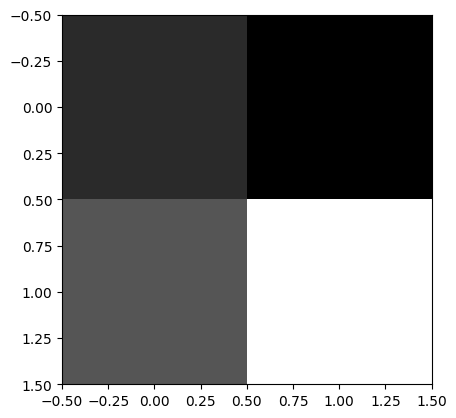

In [13]:
import cv2
import numpy as np
from torchvision.datasets import MNIST
from torchvision import transforms

# Load MNIST dataset
mnist = copy.deepcopy(train_X)

# Define downscaling function
def downscale_image(image, scale_factor):
    width = int(image.shape[1] * scale_factor)
    height = int(image.shape[0] * scale_factor)
    dim = (width, height)
    downscaled_image = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
    return downscaled_image

# Define scale factor (e.g., 0.5 for half the size)
scale_factor = 0.1

# Downscale images in MNIST dataset
downscaled_images = [downscale_image(np.array(image), scale_factor) for image in mnist]
downscaled_images = np.array(downscaled_images)

# Print shape of the downscaled images
print(downscaled_images.shape)
pyplot.imshow(downscaled_images[0], cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [53]:
# define the MLP model
in_inputs=downscaled_images[0].shape[0]*downscaled_images[0].shape[1]
output_dim = len(unique_integers)
model = MLP(in_inputs, [2,output_dim])

# limit the training set to 5 examples for now
limit_x=5
# reshape here to flatten the 2D [downscaled_images.shape[0],downscaled_images.shape[1]] into 1D -> downscaled_images.shape[0]*downscaled_images.shape[1]
inputs = downscaled_images[:limit_x].reshape(limit_x,-1)
expected_outputs = yy_one[:limit_x]

# Begin gradient descent iterations
iterations = 10
for iter in range(iterations):
  # forward the model to get scores
  scores = list(map(model, inputs))
  print('scores',scores)
  print('scores.shape',np.array(scores).shape)
  # Get probabilities of each output
  probs_predicted = []
  for i in range(len(scores)):
      total = sum(scores[i])
      probs_predicted.append([])
      if total.data == 0:
          print(f"Alert: Sum of scores at index {i} is zero.")
          # layer_num = 0
          # for layer in model.layers:
            # print(f'layer {layer_num}')
            # print(layer.parameters())
            # print("len of parameters:",len(layer.parameters()))
            # layer_num += 1
          # You can also raise an exception if needed
          # raise ValueError(f"Sum of scores at index {i} is zero.")
          # How can I log the parameters if my model is fing up?
          # for p in model.parameters():
          #   print('p',p)
      for j in range(len(scores[i])):
          if total.data == 0:
              probs_predicted[i].append(Value(0.0))
          else:
              probs_predicted[i].append(scores[i][j] / total)

  # probs = [Value(0.0) if sum(scores[i]).data == 0 else scores[i][j]/sum(scores[i]) for i in range(len(scores)) for j in range(len(scores[i]))]
  # Why do I get all zeros as the outputs for certain inputs??
    # its because of relu()
    # Solution: I think it will work itself out once I start training it
  print(probs_predicted)
  # print(expected_outputs)
  # print(np.array(probs_predicted).shape)
  # print(len(probs_predicted))

  # Mean Squared Error(MSE) Loss
    # Gain an intuition for how this will back propagate to help you update your parameters
  losses = []
  for yi_one, probs in zip(yy_one, probs_predicted):
    loss = []
    for k in range(len(yi_one)):
      # (actual-expected)**2
      loss.append((yi_one[i]-probs[i])**2)
    losses.append(loss)
  # Calculate total loss
    # take (sum_of_each_example/num_classes)
    # then data_loss = sum across all the examples / num_of_examples
    # data_loss.backward()
  data_loss = [sum(loss)/num_classes for loss in losses ]
  data_loss = sum(data_loss)/limit_x
  # print('losses',losses)
  # print('losses shape',np.array(losses).shape)
  # losses = [(yi_one-probs)**2 for yi_one, probs in zip(yy_one, probs_predicted)]

  # Back propagation
  model.zero_grad()
  data_loss.backward()
  print('total loss:',data_loss)

  # Update parameters
  for p in model.parameters():
    # print('p.grad',p.grad)
    # print('p before',p)
    p.data -= p.grad
    # print('p after',p)
    # print()
# for l in range(len(model.layers)):
#   print(f'Layer {l}')
#   for p in model.layers[l].parameters():
#     print('p',p)

scores [[Value(data=14.761208020038612, grad=0), Value(data=-29.240798196111747, grad=0), Value(data=-5.3943238632547885, grad=0), Value(data=-1.0464944879799334, grad=0), Value(data=24.92118483231581, grad=0), Value(data=3.147339342161426, grad=0), Value(data=-38.55324612727477, grad=0), Value(data=36.02671562214486, grad=0), Value(data=-34.96476111353706, grad=0), Value(data=-2.222324062950971, grad=0)], [Value(data=17.204355661852752, grad=0), Value(data=-34.08048252686659, grad=0), Value(data=-6.287145752073221, grad=0), Value(data=-1.2197012158445395, grad=0), Value(data=29.045924072602418, grad=0), Value(data=3.6682597628581624, grad=0), Value(data=-44.934246397189334, grad=0), Value(data=41.98954638742268, grad=0), Value(data=-40.75182634188205, grad=0), Value(data=-2.590143945061899, grad=0)], [Value(data=13.096896271840654, grad=0), Value(data=-25.94392683582675, grad=0), Value(data=-4.786119130484139, grad=0), Value(data=-0.9285032593213419, grad=0), Value(data=22.11134564848

In [48]:
print('model total parameters',len(model.parameters()))
# in_inputs
layer_len = len(model.layers)
print('layer length',layer_len)
# print('in_inputs',in_inputs)
# print('length of parameters',len(model.layers[layer_len-4].parameters()))
# counter = 0
# for l in range(len(model.layers):
#   if(p.grad != 0):
#     print('counter',counter)
#     print('p ', p)
#   counter += 1
for l in range(len(model.layers)):
  print(f'Layer {l}')
  for p in model.layers[l].parameters():
    print('p',p)

model total parameters 40
layer length 2
Layer 0
p Value(data=0.3654248334954173, grad=0.0)
p Value(data=-0.4374068669121398, grad=0.0)
p Value(data=-0.8555745462165814, grad=0.0)
p Value(data=-0.9496480928712234, grad=0.0)
p Value(data=0, grad=0.0)
p Value(data=-0.5086089169313228, grad=5.745404152435185e-15)
p Value(data=0.8058789569529698, grad=1.1379786002407855e-14)
p Value(data=-0.12017622482722823, grad=9.270362255620057e-15)
p Value(data=-0.6389466672066417, grad=6.2450045135165055e-15)
p Value(data=0, grad=1.942890293094024e-16)
Layer 1
p Value(data=0.2851531415759261, grad=0.0)
p Value(data=0.5779119841823439, grad=-16.193038476581734)
p Value(data=0, grad=-1.4408680209647295)
p Value(data=0.030763850698566575, grad=0.0)
p Value(data=-0.7234122934672151, grad=-16.193038476581734)
p Value(data=0, grad=-1.4408680209647295)
p Value(data=-0.848132684255062, grad=0.0)
p Value(data=-0.04388960273528686, grad=-16.193038476581734)
p Value(data=0, grad=-1.4408680209647295)
p Value(dat